In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils.random import sample_without_replacement
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
data=pd.read_csv('clothing.csv')
data=data[['Description','Category']]
data

,Description,Category
0,Cheer on your Florida State Seminoles in this ...,Upper Body Wear Tops
1,Celebrate your Baltimore Ravens fandom during ...,Upper Body Wear Tops
2,A faux sheepskin bat-sleeve (Dolman) top ...,Upper Body Wear Tops
3,Don't let a cold snap keep you from supporting...,Upper Body Wear Tops
4,The time has come for the Atlantic 10 Conferen...,Upper Body Wear Tops
5,Celebrate your fandom with this Miami Hurrican...,Upper Body Wear Tops
6,Cheer on your Rutgers Scarlet Knights in this ...,Upper Body Wear Tops
7,Celebrate your Florida Gators fandom with this...,Upper Body Wear Tops
8,Celebrate your Maryland Terrapins fandom with ...,Upper Body Wear Tops
9,"When the season changes, the nights get longer...",Upper Body Wear Tops


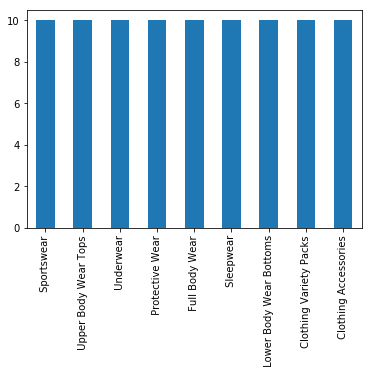

In [3]:
data['Category'].value_counts().plot(kind="bar")
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data['Description'],data['Category'], test_size=0.33, random_state=42)

In [5]:
vectorizer = TfidfVectorizer(stop_words='english')
vectorizer.fit(X_train)
print(vectorizer.vocabulary_)
x= vectorizer.transform(X_train)
clf = RandomForestClassifier(n_estimators=2200)
clf.fit(x,y_train)
x_test=vectorizer.transform(X_test)
y_predict=clf.predict(x_test)
f1_score(y_test,y_predict,average='weighted')

{'curved': 173, 'declare': 187, '82': 17, 'ii': 342, 'mavericks': 424, 'winter': 768, 'tone': 710, 'woven': 777, 'playing': 496, 'great': 310, 'frostier': 287, 'leather': 386, 'home': 333, 'leg': 389, 'chest': 117, 'tailored': 681, 'maryland': 421, 'formal': 283, 'occasion': 456, 'terps': 693, 'better': 66, 'giberson': 299, 'flex': 272, 'school': 570, 'run': 560, 'poly': 505, 'north': 454, 'sweetheart': 675, 'ivory': 364, 'viscose': 743, 'orleans': 460, 'drawcord': 210, 'sublimated': 662, 'knot': 375, 'representing': 545, 'raiders': 531, 'action': 22, 'really': 538, 'shirt': 591, 'pride': 514, 'frill': 285, 'shows': 597, 'eye': 244, 'tube': 721, 'sweet': 674, 'got': 307, 'sheepskin': 587, 'sporting': 637, 'dot': 208, 'hides': 328, 'bold': 76, 'rock': 552, 'gear': 296, '15': 2, 'wins': 767, 'breezy': 89, 'spartans': 632, 'legs': 392, 'looks': 411, 'snuggle': 625, 'single': 602, 'allover': 31, 'regular': 541, 'national': 440, 'cowboys': 166, 'potential': 509, 'columbia': 144, 'ski': 607,

0.53063492063492068

In [ ]:
accuracy_score(y_test, y_predict)

0.5

In [ ]:
from sklearn.pipeline import make_pipeline
clf = make_pipeline(vectorizer,RandomForestClassifier(n_estimators=2200))
cross_val_score(clf,data['Description'],data['Category'], cv=5)